In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


- 10개 피쳐와 타겟

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 결정계수
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    lr.fit(X, diabetes.target)
    score = lr.score(X, diabetes.target)
    print(f'{feature}:{score:.4f}')

age:0.0353
sex:0.0019
bmi:0.3439
bp:0.1949
s1:0.0450
s2:0.0303
s3:0.1559
s4:0.1853
s5:0.3202
s6:0.1463


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2023
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 1), (45, 1), (397,), (45,))

In [ ]:
from sklearn.metrics import mean_squared_error

In [12]:
X = df[feature].values.reshape(-1,1)
pred = lr.predict(X)
X.shape, pred.shape, pred.reshape(-1,1).shape

((442, 1), (442,), (442, 1))

In [13]:
# mse
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    pred = lr.predict(X)
    score = mean_squared_error(y_test, pred.reshape(-1,1))
    print(f'{feature}:{score:.4f}')

ValueError: Found input variables with inconsistent numbers of samples: [45, 442]

- 2.

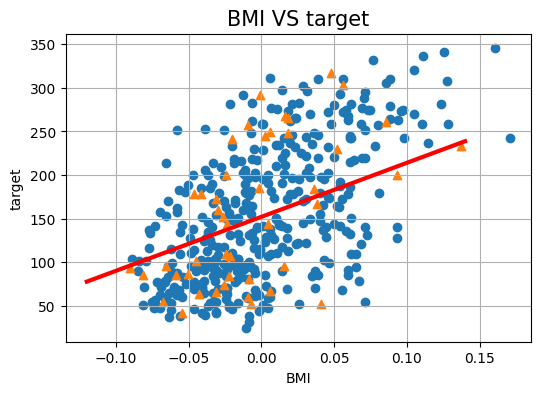

In [7]:
xs = np.array([-0.12, 0.14])
ys = np.dot(lr.coef_[0], xs) + lr.intercept_

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, label='train dataset')
plt.scatter(X_test, y_test ,marker='^', label='test dataset')
plt.grid()
plt.plot(xs, ys, 'r-', lw=3)
plt.xlabel('BMI'), plt.ylabel('target')
plt.title('BMI VS target', fontsize=15)
plt.savefig('data/BMI와_Target.png')
plt.show()

In [21]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test, pred_sv)
print(f'결정계수 : {r2_sv}, MSE : {mse_sv}')

결정계수 : 0.1712464058178753, MSE : 5372.924553433315


In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
print(f'결정계수 : {r2_rf}, MSE : {mse_rf}')

결정계수 : 0.07352069846761411, MSE : 6006.493875135066


In [17]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)
print(f'결정계수 : {r2_xg}, MSE : {mse_xg}')

결정계수 : 0.05896899650405141, MSE : 6100.834578238054


In [18]:
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
print(f'결정계수 : {r2_lr}, MSE : {mse_lr}')

결정계수 : 0.2906241522424071, MSE : 4598.98205785851


In [19]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=2023)
ridge.fit(X_train, y_train)
pred_rg = ridge.predict(X_test)
r2_rg = r2_score(y_test, pred_rg)
mse_rg = mean_squared_error(y_test, pred_rg)
print(f'결정계수 : {r2_rg}, MSE : {mse_rg}')

결정계수 : 0.2110754155842106, MSE : 5114.707556228413


In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=2023)
lasso.fit(X_train, y_train)
pred_ls = lasso.predict(X_test)
r2_ls = r2_score(y_test, pred_ls)
mse_ls = mean_squared_error(y_test, pred_ls)
print(f'결정계수 : {r2_ls}, MSE : {mse_ls}')

결정계수 : 0.22929854397789018, MSE : 4996.564486111903
